### Importing Libraries

In [1]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from math import sqrt

import scipy.stats as stats
import pylab

In [2]:
df = pd.read_csv('train.csv')
df

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15725,16554,Women Maroon Heels Sandal,4.3,Women,Flipkart,567,1199,52.71%,807.0,114.0,485.0,177.0,61.0,41,43,0
15726,19600,Women Multicolor Flats Sandal,3.9,Women,Flipkart,499,998,50.00%,246.0,34.0,120.0,45.0,37.0,16,28,1
15727,6733,Women Navy Flats Sandal,3.7,Women,Flipkart,329,499,34.07%,NaN,18.0,NaN,NaN,20.0,10,15,1
15728,3889,Red Chief Men's Sneakers,3.9,Men,Amazon,2249,4499,50.01%,750.0,479.0,13.0,6.0,10.0,25,47,1


In [3]:
df.describe()

,id,Rating,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
count,15730.000000,15730.000000,15730.000000,15730.000000,15052.000000,15152.000000,15142.000000,15191.000000,15499.000000,15730.000000,15730.000000,15730.000000
mean,10479.541577,4.012873,688.070693,1369.286777,3057.660776,423.976307,1585.239466,655.923310,357.260662,155.085188,275.500572,0.601526
std,6080.166276,0.298440,649.409586,1240.900227,11846.965689,1768.230384,6177.476241,2855.735531,1402.246610,558.650254,958.589075,0.489600
min,3.000000,0.000000,69.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5212.000000,3.900000,349.000000,699.000000,63.000000,9.000000,30.000000,12.000000,7.000000,3.000000,6.000000,0.000000
50%,10458.500000,4.000000,474.000000,999.000000,308.000000,44.000000,150.000000,60.000000,34.000000,17.000000,30.000000,1.000000
75%,15766.750000,4.200000,699.000000,1299.000000,1526.000000,215.000000,788.000000,300.000000,172.000000,77.000000,140.000000,1.000000
max,20973.000000,5.000000,5998.000000,13499.000000,289973.000000,45448.000000,151193.000000,74037.000000,34978.000000,11705.000000,18060.000000,1.000000


In [4]:
df.nunique()

id            15730
title          4782
Rating           34
maincateg         2
platform          2
price1         1478
actprice1       885
Offer %        2530
norating1      2770
noreviews1     1122
star_5f        2196
star_4f        1448
star_3f        1107
star_2f         759
star_1f        1001
fulfilled1        2
dtype: int64

In [5]:
df.isnull().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [6]:
df.dtypes

id              int64
title          object
Rating        float64
maincateg      object
platform       object
price1          int64
actprice1       int64
Offer %        object
norating1     float64
noreviews1    float64
star_5f       float64
star_4f       float64
star_3f       float64
star_2f         int64
star_1f         int64
fulfilled1      int64
dtype: object

In [7]:
df.shape

(15730, 16)

In [8]:
df.duplicated().sum()

0

In [9]:
#drop id  and Offer %(Not present in final test data of hackathon)
df.drop(['id', 'Offer %'], axis=1, inplace=True)

### Data Visualization

<Axes: xlabel='variable', ylabel='value'>

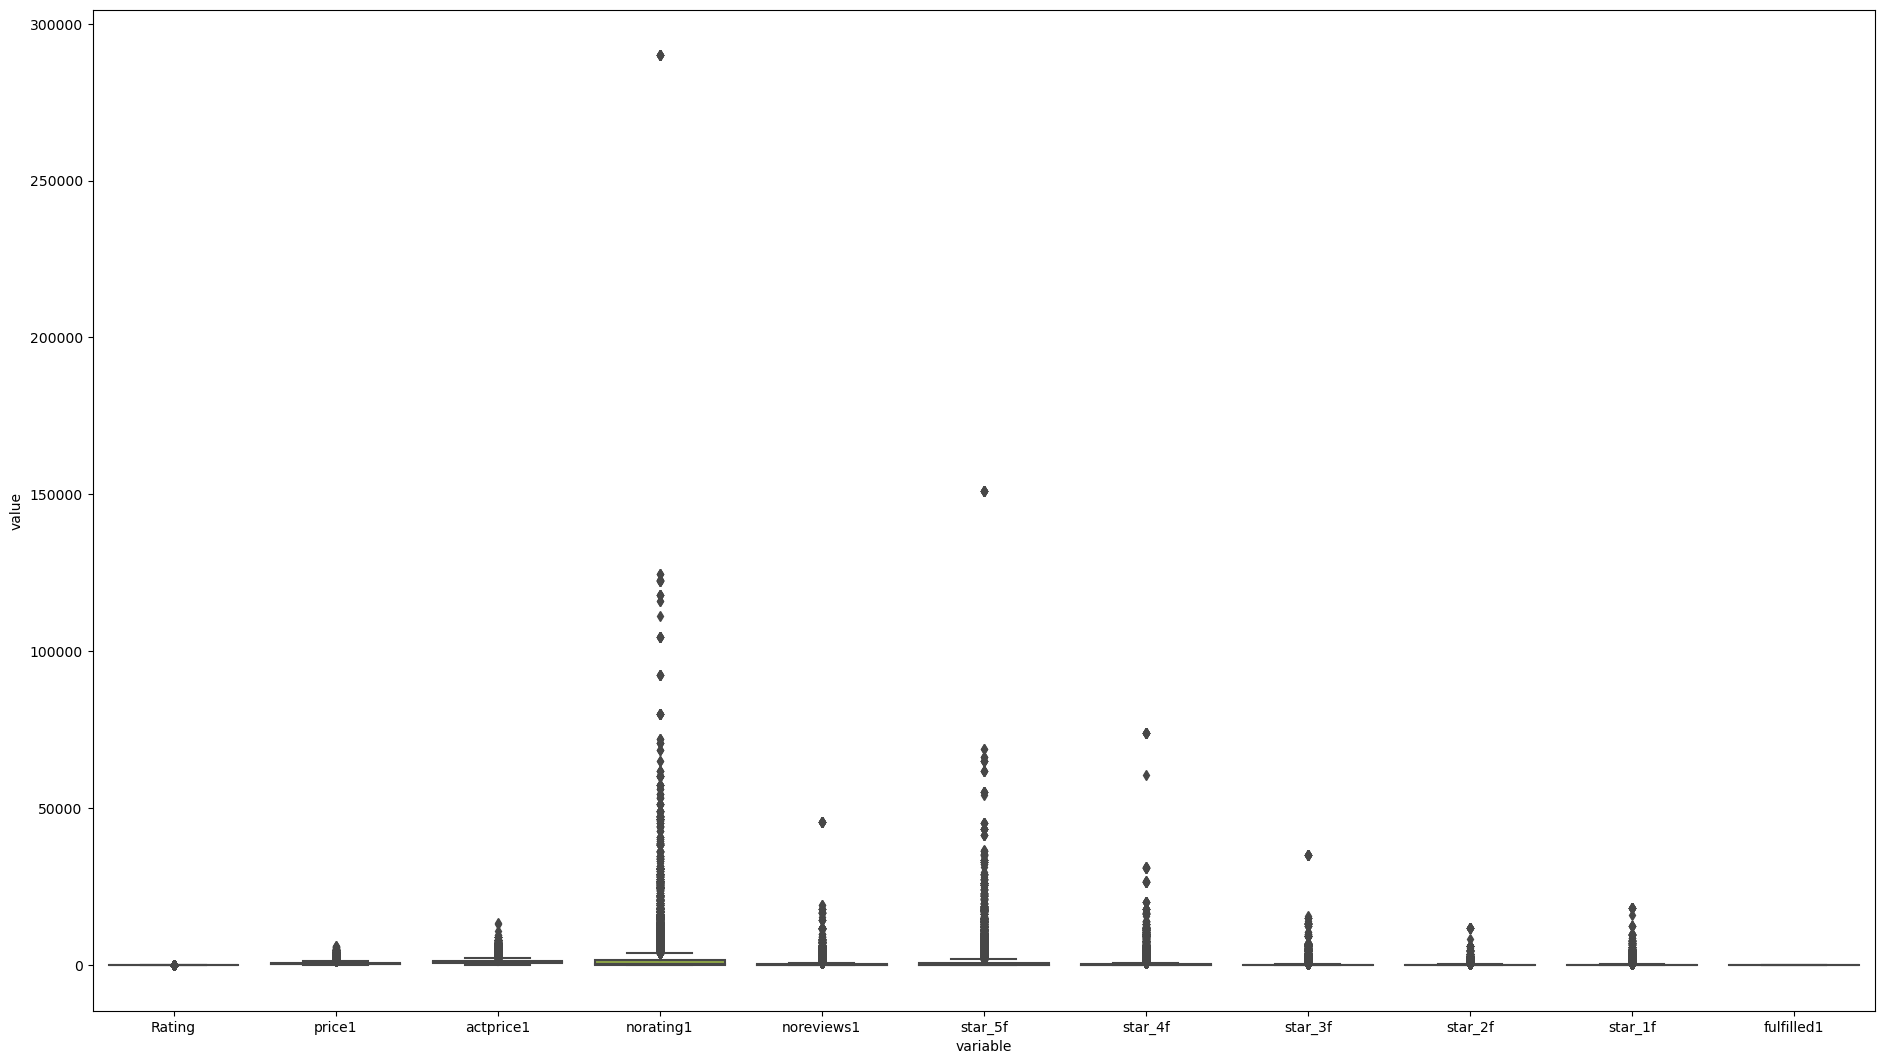

In [10]:
#Boxplot
df_box = df.drop(["title", "maincateg", "platform"], axis=1)
plt.figure(figsize = (23, 13))
# sns.boxplot(x=df_box)
sns.boxplot(x="variable", y="value", data = pd.melt(df_box))

# sns.set(rc = {'figure.figsize':(26,13)})


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


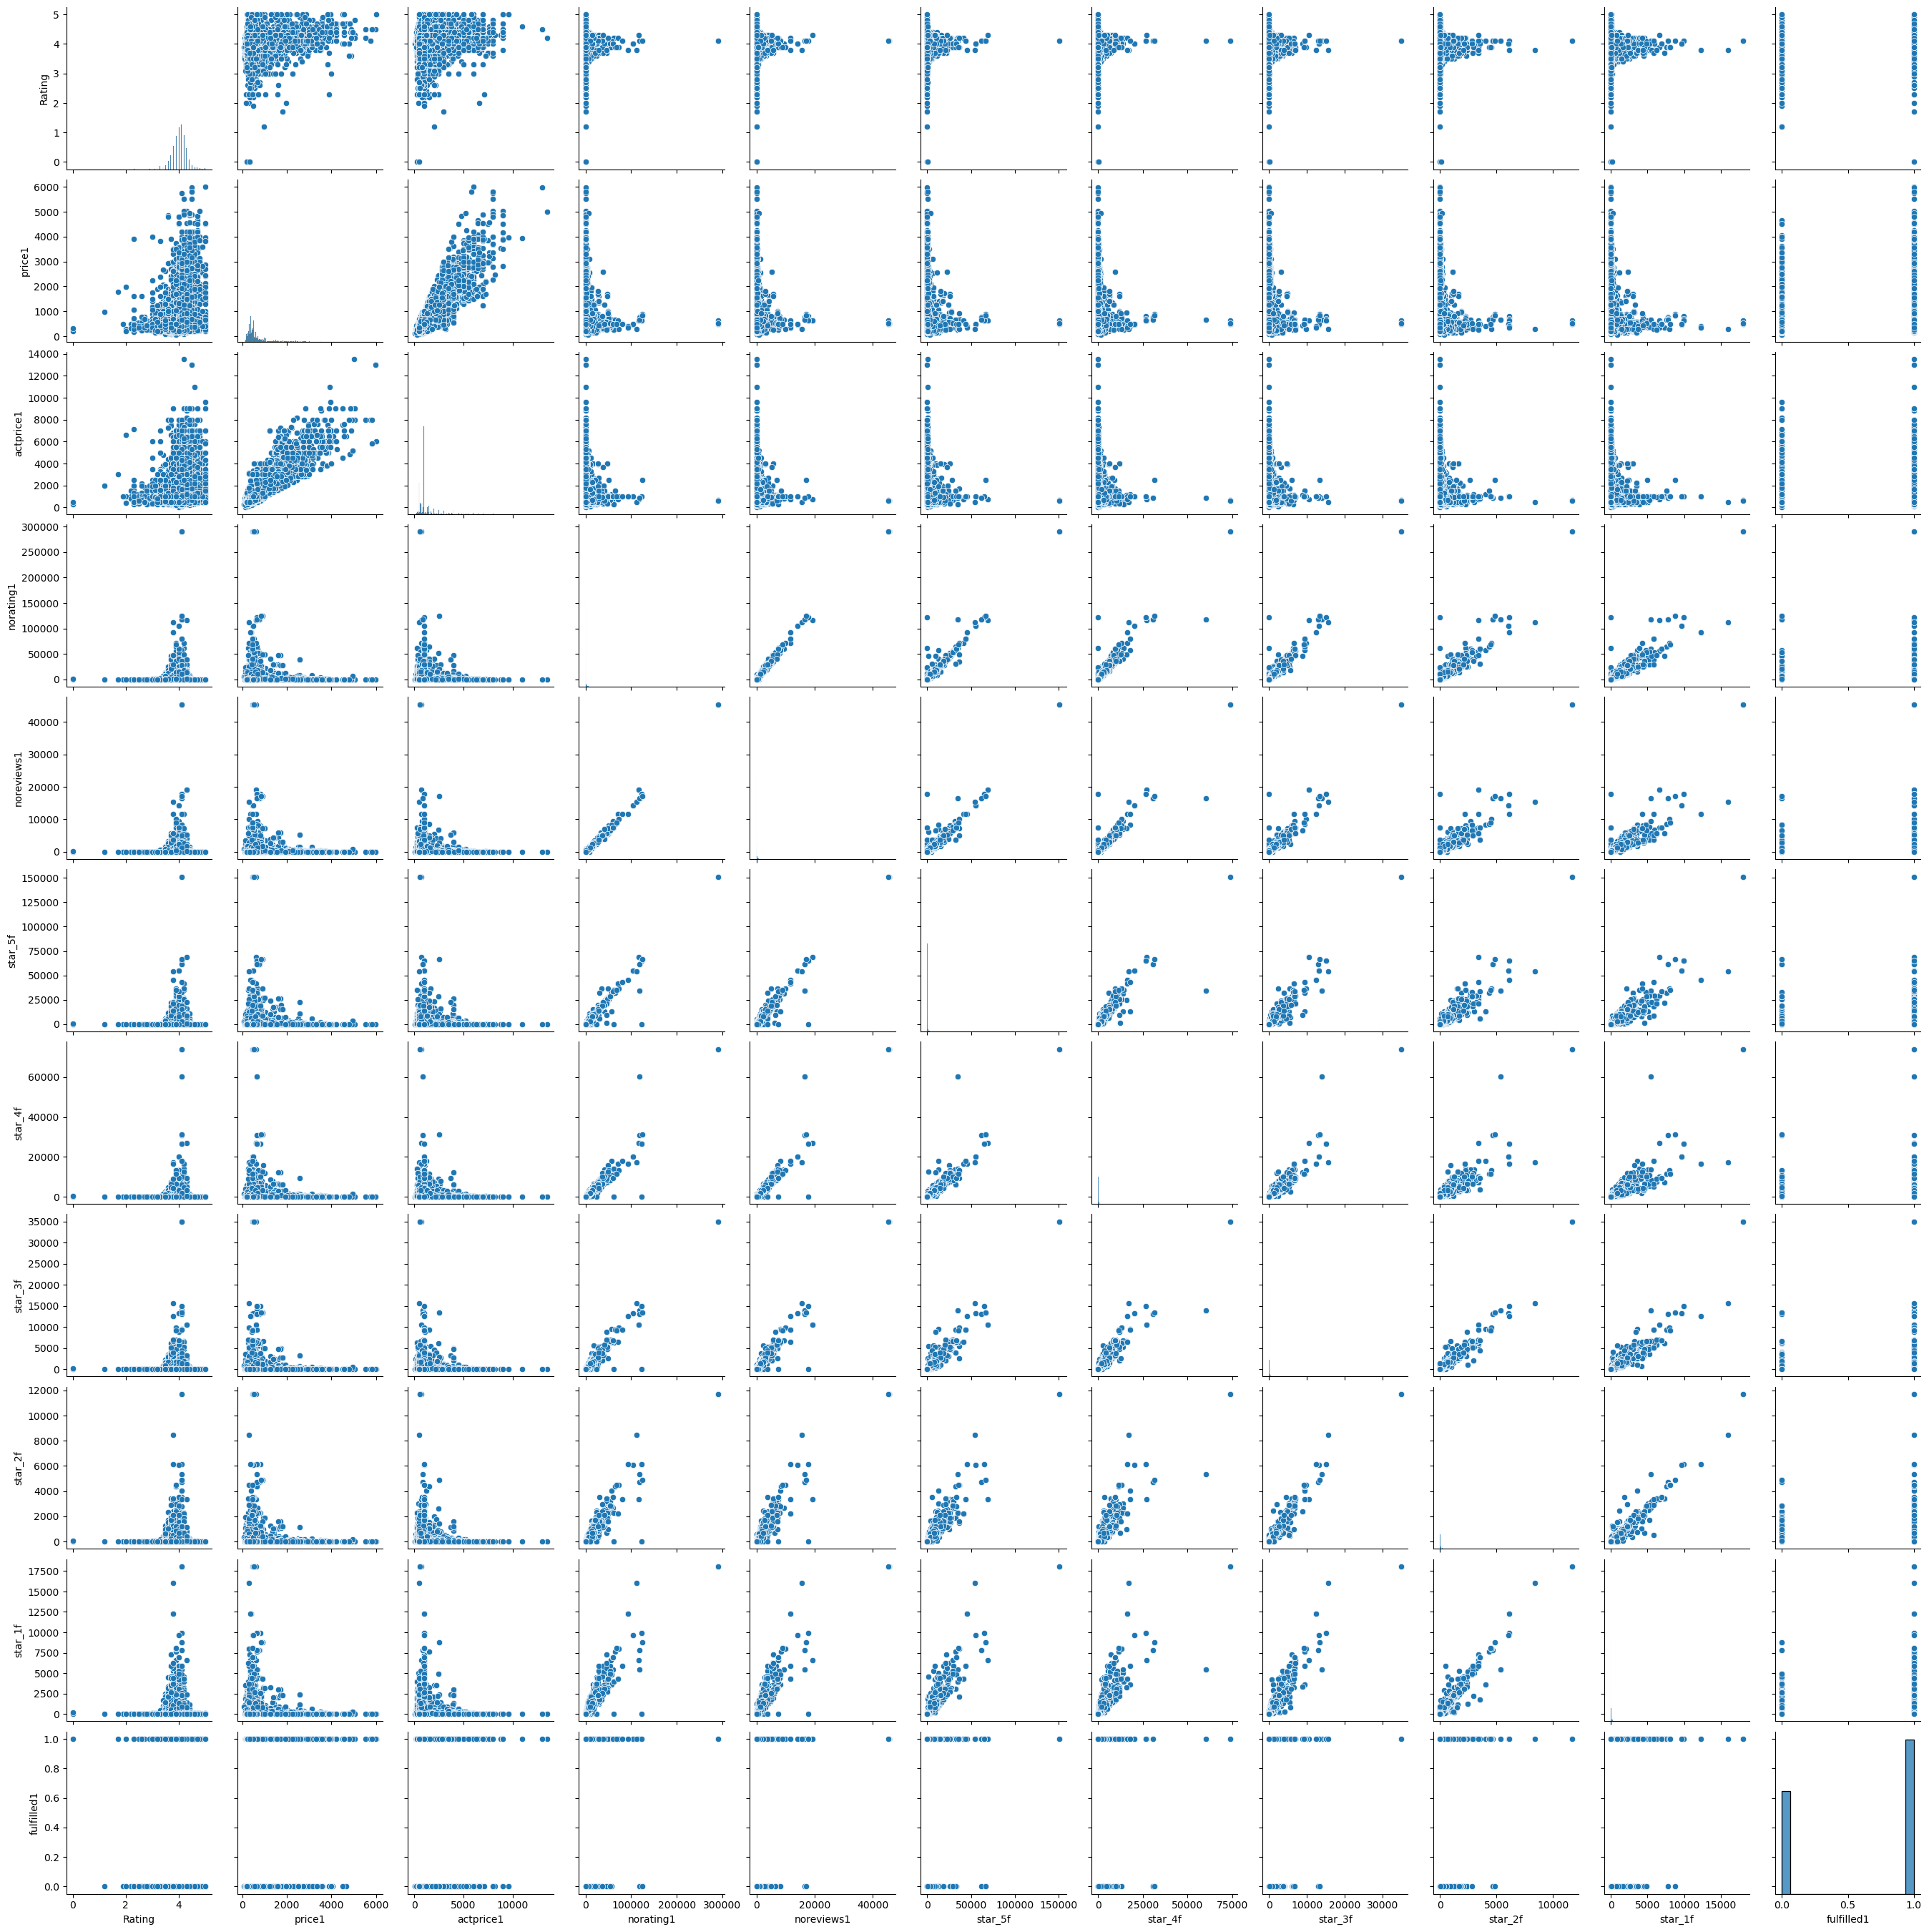

In [11]:
sns.pairplot(df)

<Axes: >

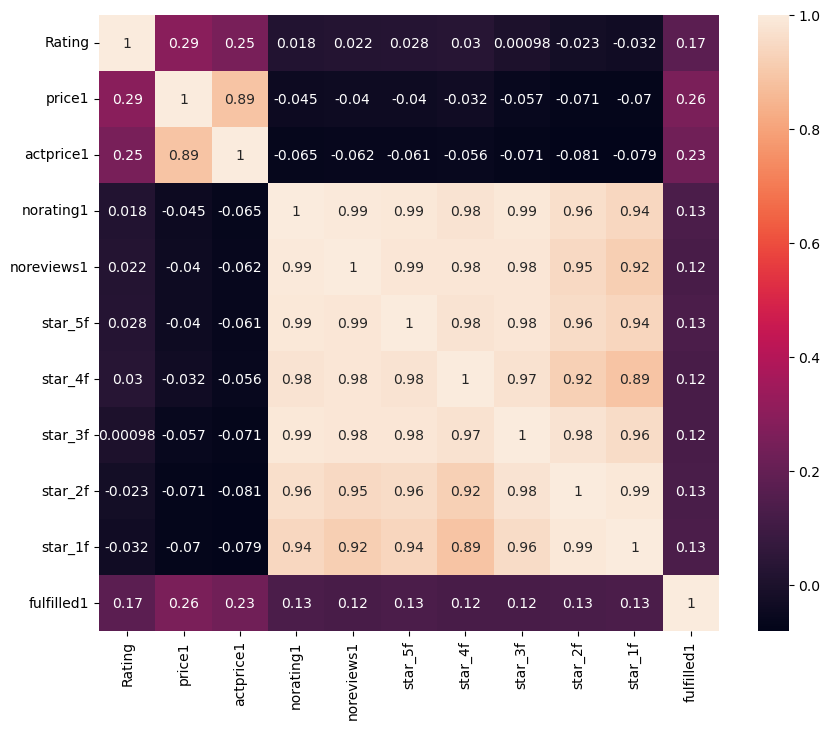

In [12]:
#Correlation plot
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [13]:
df = df.drop('norating1', axis=1) #correlated

## Handling Missing Values

In [14]:
df.isnull().sum()

title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

Many of the <b>maincateg</b> null values can be filled using <b>title</b> column

In [15]:
df.maincateg.value_counts()

maincateg
Women    8781
Men      6423
Name: count, dtype: int64

In [16]:
df.loc[df['title'].str.upper().str.contains('WOMEN') & df['maincateg'].isnull(), 'maincateg'] = 'Women'
df.loc[df['title'].str.upper().str.contains('MEN' or 'BOY') & df['maincateg'].isnull(), 'maincateg'] = 'Men'
df['maincateg'].isnull().sum()

57

In [17]:
df.loc[df['title'].str.upper().str.contains('WOMEN') & df['maincateg'].isnull(), 'maincateg']

Series([], Name: maincateg, dtype: object)

In [19]:
df['maincateg'].value_counts()

maincateg
Women    9059
Men      6614
Name: count, dtype: int64

In [20]:
df.loc[df['maincateg'].isnull(), 'maincateg'] = 'Women'
print(df['maincateg'].isnull().sum())
print(df['maincateg'].unique())

0
['Women' 'Men']


In [21]:
df.drop('title', axis=1, inplace=True)

Star ratings and norating1 null values

In [22]:
#handle numerical missing values
from sklearn.impute import SimpleImputer
cols = [ 'noreviews1', 'star_5f','star_4f', 'star_3f']
imp = SimpleImputer(strategy = "median")
df[cols] = imp.fit_transform(df[cols])
df.isnull().sum()

Rating        0
maincateg     0
platform      0
price1        0
actprice1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

In [23]:
Y = df['price1']
X = df.drop(['price1'], axis=1)

Encoding of categorical variables

In [24]:

X_t = pd.get_dummies(X)
X_t.head()

,Rating,actprice1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,maincateg_Men,maincateg_Women,platform_Amazon,platform_Flipkart
0,3.9,999,7.0,17.0,9.0,6.0,3,3,0,False,True,False,True
1,3.8,1999,69.0,264.0,92.0,73.0,29,73,1,True,False,False,True
2,4.4,4999,4.0,11.0,3.0,2.0,1,0,1,False,True,False,True
3,4.2,724,6229.0,1045.0,12416.0,5352.0,701,4595,1,True,False,False,True
4,3.9,2299,3.0,35.0,21.0,7.0,7,7,1,True,False,False,True


Feature Scaling 

In [25]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled=pd.DataFrame(scaler.fit_transform(X_t))
X_scaled.columns = X_t.columns

### Model Implementation

In [26]:
# Metric
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

RMSE_test = []
RMSE_train = []
Model_Name = []

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split( X_scaled, Y, test_size=0.25,  random_state=42 ) 

In [28]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


model_list = [RandomForestRegressor(),XGBRegressor(),DecisionTreeRegressor(),ElasticNet(), SVR(),
              GradientBoostingRegressor(),
              AdaBoostRegressor(),Lasso(),LinearRegression(),Ridge()]

for model in model_list:
    print(model)
    model.fit(X_train, y_train)

    print('Test Set --------------')
    y_predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, y_predictions)
    rmse = np.sqrt(mse)

    RMSE_test.append(rmse)
    Model_Name.append( 'RandomForestRegressor' )

    print('Root Mean Square Error : ', rmse )
    print('\n')

    print('Train Set --------------')
    y_predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, y_predictions)
    rmse = np.sqrt(mse)
    RMSE_train.append(rmse)
    print('Root Mean Square Error : ', rmse )
    
    print('\n')
    print('\n')
    print("-------------------------------------------------------------------------------")

RandomForestRegressor()
Test Set --------------
Root Mean Square Error :  206.53158030315333


Train Set --------------
Root Mean Square Error :  79.74636411319607




-------------------------------------------------------------------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Test Set --

We can see that Random Forest Regressor is doing best here

In [29]:
# RandomForest
# Number of trees in random forest
n_estimators = [100, 200, 400, 500, 800, 1000, 1200 ]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [30]:
rand_reg = RandomForestRegressor()

In [31]:
random_CV = RandomizedSearchCV(estimator = rand_reg, param_distributions = random_grid,cv=3, 
                               n_iter=50, verbose=5, random_state=42)

In [32]:
# random_CV.fit(X_scaled, Y)

In [33]:
# random_CV.best_estimator_

In [34]:
rand_final = RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                      n_estimators=200);
rand_final.fit(X_scaled, Y)

RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                      n_estimators=200)

In [35]:
df_test = pd.read_csv('test.csv')

In [36]:
x_test = df_test.drop(['id', 'norating1'], axis =1)
x_test

,title,Rating,maincateg,platform,actprice1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,Casuals For Men (Blue),3.8,Men,Flipkart,999,3543,14238.0,4295,3457,1962,3976.0,1
1,Women Black Flats Sandal,3.9,Women,Flipkart,499,404,1458.0,657,397,182,321.0,1
2,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,52,229.0,70,71,33,46.0,1
3,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,40,141.0,51,49,17,32.0,1
4,Loafers For Men (Tan),3.9,Men,Flipkart,999,326,1265.0,414,293,143,308.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5239,Women Off White Flats Sandal,NaN,Women,Flipkart,699,153,NaN,323,155,62,NaN,1
5240,Slip On For Men (Tan),3.9,Men,Flipkart,1993,56,350.0,37,60,5,37.0,0
5241,Women Grey Heels Sandal,3.8,Women,Flipkart,999,135,574.0,290,172,94,150.0,0
5242,Womens Casual Comfort Stylish Black High Heel ...,3.9,Women,Flipkart,499,574,2384.0,974,648,328,533.0,0


In [37]:
x_test.isnull().sum()

title           0
Rating        203
maincateg      67
platform        0
actprice1       0
noreviews1      0
star_5f        68
star_4f         0
star_3f         0
star_2f         0
star_1f       186
fulfilled1      0
dtype: int64

In [38]:
x_test['Rating'].fillna(x_test.Rating.median(), inplace=True)
x_test['star_1f'].fillna(x_test.star_1f.median(), inplace=True)
x_test['star_5f'].fillna(x_test.star_5f.median(), inplace=True)


In [39]:
x_test.loc[x_test['title'].str.upper().str.contains('WOMEN') & x_test['maincateg'].isnull(), 'maincateg'] = 'Women'
x_test.loc[x_test['title'].str.upper().str.contains('MEN' or 'BOY') & x_test['maincateg'].isnull(), 'maincateg'] = 'Men'
x_test['maincateg'].isnull().sum()

7

In [40]:
x_test['maincateg'].value_counts()

maincateg
Women    3068
Men      2169
Name: count, dtype: int64

In [41]:
x_test.loc[x_test['maincateg'].isnull(), 'maincateg'] = 'Women'

In [42]:
x_test.isnull().sum()

title         0
Rating        0
maincateg     0
platform      0
actprice1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

In [43]:
x_test = x_test.drop('title', axis=1)

In [44]:
x_test = pd.get_dummies(x_test)
x_test.head()

,Rating,actprice1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,maincateg_Men,maincateg_Women,platform_Amazon,platform_Flipkart
0,3.8,999,3543,14238.0,4295,3457,1962,3976.0,1,True,False,False,True
1,3.9,499,404,1458.0,657,397,182,321.0,1,False,True,False,True
2,3.9,999,52,229.0,70,71,33,46.0,1,False,True,False,True
3,3.9,2999,40,141.0,51,49,17,32.0,1,True,False,False,True
4,3.9,999,326,1265.0,414,293,143,308.0,0,True,False,False,True


In [45]:
X_test_scaled=pd.DataFrame(scaler.transform(x_test))
X_test_scaled.columns = x_test.columns
X_test_scaled.dtypes

Rating               float64
actprice1            float64
noreviews1           float64
star_5f              float64
star_4f              float64
star_3f              float64
star_2f              float64
star_1f              float64
fulfilled1           float64
maincateg_Men        float64
maincateg_Women      float64
platform_Amazon      float64
platform_Flipkart    float64
dtype: object

In [46]:

predictions =pd.DataFrame(df_test["id"])
predictions['price1'] = rand_final.predict(X_test_scaled)
predictions

,id,price1
0,2242,431.000000
1,20532,284.000000
2,10648,499.000000
3,20677,1195.285000
4,12593,405.095000
...,...,...
5239,14033,409.531250
5240,297,735.899667
5241,18733,389.000000
5242,6162,189.000000


In [47]:
submission = predictions.to_csv("prediction_results.csv", index = False) 